### Dataset Path
##### https://www.kaggle.com/datasets/rabisingh/symptom-checker

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import csv,numpy as np,pandas as pd
import numpy as np
#from fcmeans import FCM
from matplotlib import pyplot as plt
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore") 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Reading Data from the Folder

In [133]:
data = pd.read_csv('../input/symptom-checker/Training.csv', encoding='utf-8')
df = pd.DataFrame(data)

cols = df.columns[:-1]
# Features
x = df[cols]
# Target variable
y = df['prognosis']


## Data Split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.33, random_state=42)
print("Count of samples in X_train:", len(X_train))
print("Count of samples in X_test:", len(X_test))
print("Count of labels in y_train:", len(y_train))
print("Count of labels in y_test:", len(y_test))
#print(X_train.dtypes)
#print(y_train.dtypes)

Count of samples in X_train: 3296
Count of samples in X_test: 1624
Count of labels in y_train: 3296
Count of labels in y_test: 1624


## Neural network

In [135]:
# Split data into features (x) and target variable (y)
x = df.drop(columns=['prognosis'])
y = df['prognosis']

# Convert DataFrame to numpy arrays
x_np = x.to_numpy()
y_np = y.to_numpy()

# Normalize features
x_np = (x_np - x_np.mean()) / x_np.std()

# Convert target labels to integers
label_encoder = LabelEncoder()
y_np = label_encoder.fit_transform(y_np)

# Convert numpy arrays to PyTorch tensors
x_tensor = torch.tensor(x_np, dtype=torch.float32)
y_tensor = torch.tensor(y_np, dtype=torch.long)

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Define hyperparameters
input_size = x_np.shape[1]
hidden_size = 64
output_size = len(np.unique(y_np))

# Initialize the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the neural network
with torch.no_grad():
    outputs = model(x_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_tensor).sum().item() / len(y_tensor)
    print(f'Accuracy on train set: {accuracy:.2f}')


Epoch [10/100], Loss: 3.6980
Epoch [20/100], Loss: 3.6519
Epoch [30/100], Loss: 3.5464
Epoch [40/100], Loss: 3.3848
Epoch [50/100], Loss: 3.2221
Epoch [60/100], Loss: 3.0765
Epoch [70/100], Loss: 2.9571
Epoch [80/100], Loss: 2.8701
Epoch [90/100], Loss: 2.8289
Epoch [100/100], Loss: 2.8147
Accuracy on train set: 0.95


In [136]:
new_data_np = x[:1].to_numpy()

# Normalize features (assuming you normalized the training data)
new_data_np = (new_data_np - x_np.mean()) / x_np.std()

# Convert numpy array to PyTorch tensor
new_data_tensor = torch.tensor(new_data_np, dtype=torch.float32)

# Make predictions on the new data
with torch.no_grad():
    outputs = model(new_data_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted_labels = label_encoder.inverse_transform(predicted.numpy())

# Print the predicted labels
print(predicted_labels)


['Fungal infection']


## Data Statatics

In [137]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Analysis and Visualization

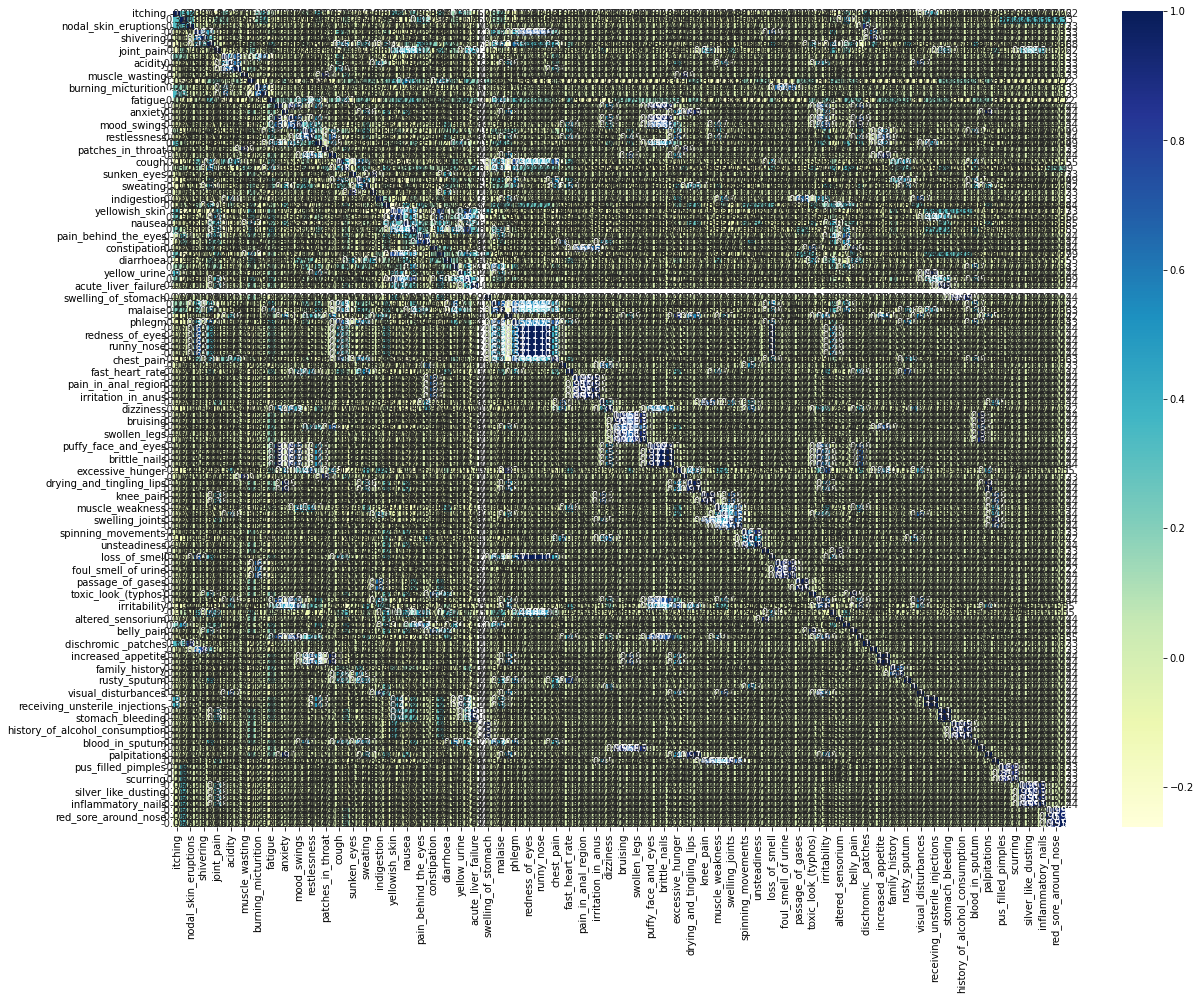

In [138]:
# Increase the size of the figure
fig, ax = plt.subplots(figsize=(20, 15))

# Generate the heatmap with annotations
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)

# Adjust font size of the annotations
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

## Scatter and density plots

In [139]:
def plotScatterMatrix(df, plotSize=20, textSize=10):
    # Keeping only numerical columns
    df = df.select_dtypes(include=[np.number])

    # Remove rows and columns with missing values
    df = df.dropna(axis='columns')

    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    # Reduce the number of columns for matrix inversion of kernel density plots
    if len(df.columns) > 10:
        df = df.iloc[:, :10]

    # Create scatter matrix plot
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=(plotSize, plotSize), diagonal='kde')

    # Add correlation coefficients as annotations
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)

    # Set title and adjust layout
    plt.suptitle('Scatter and Density Plot', fontsize=textSize+5)
    plt.tight_layout()

    # Show the plot
    plt.show()

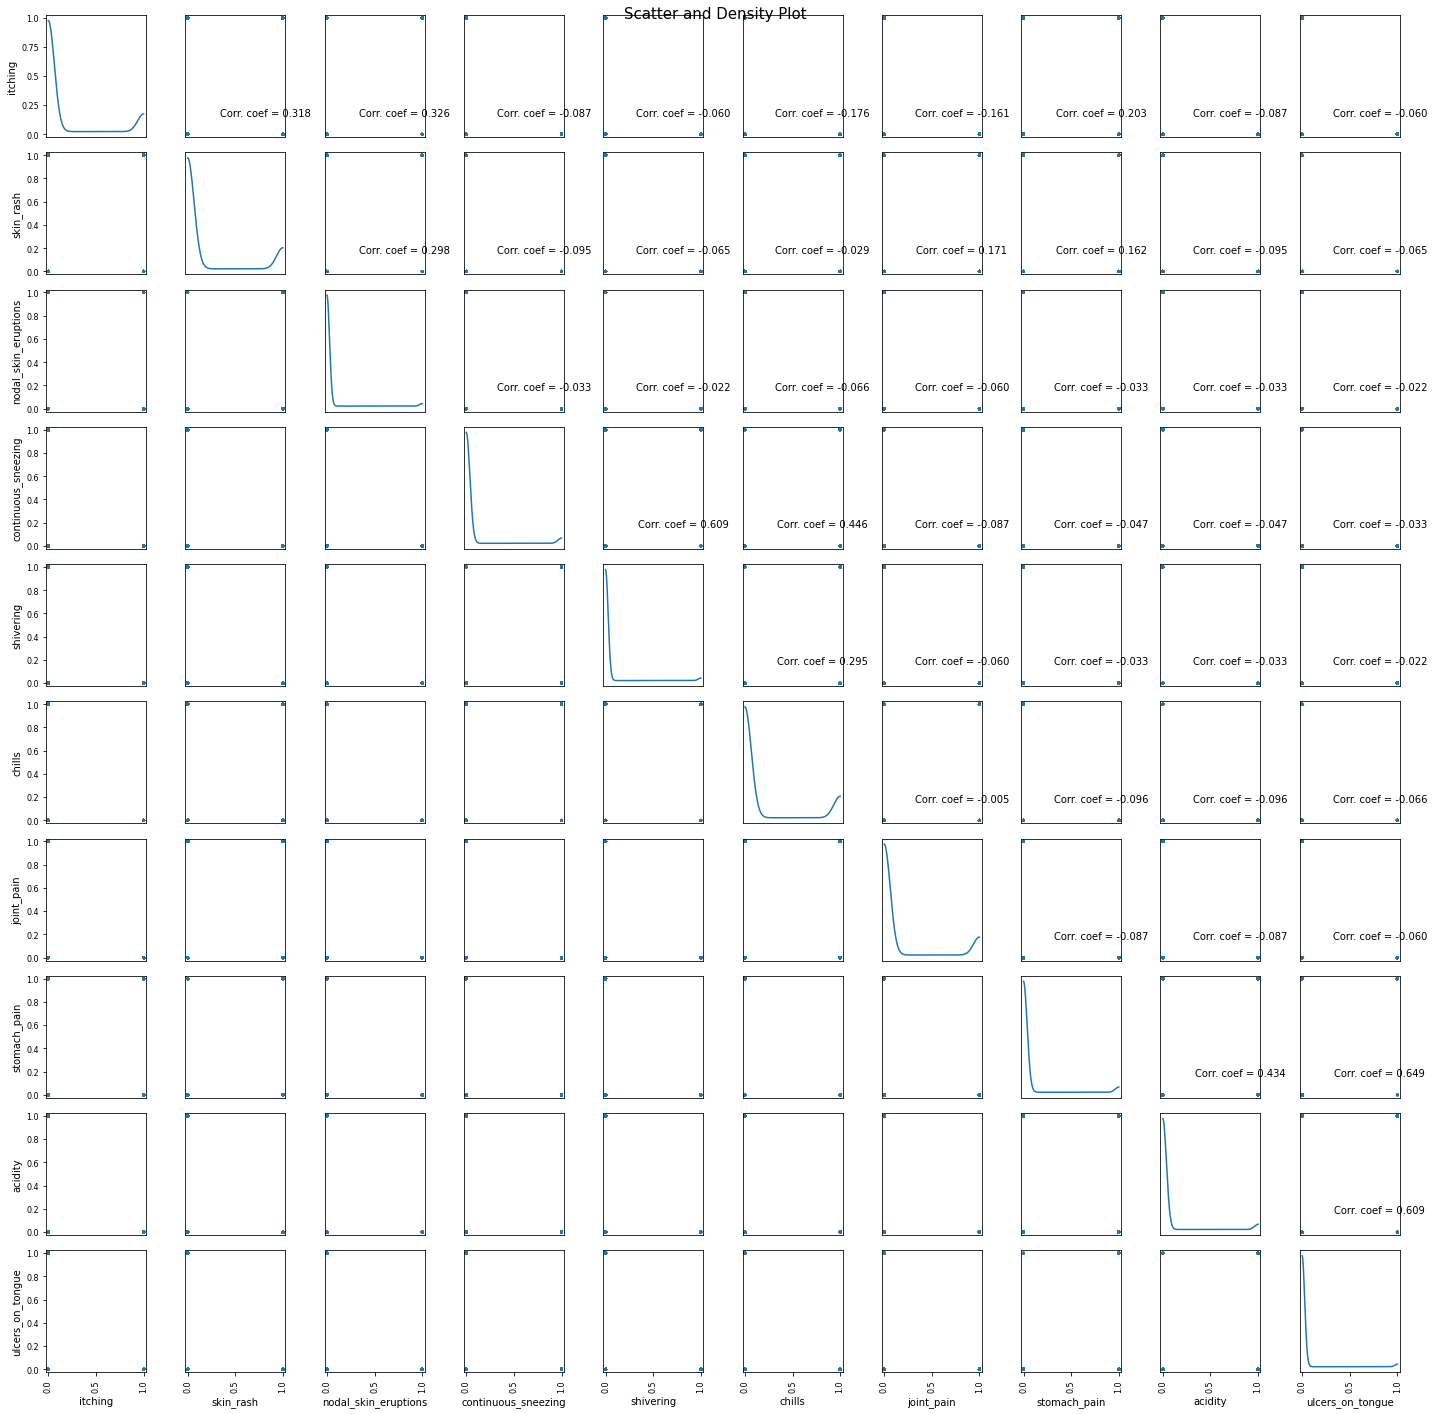

In [140]:
plotScatterMatrix(df, 20, 10)

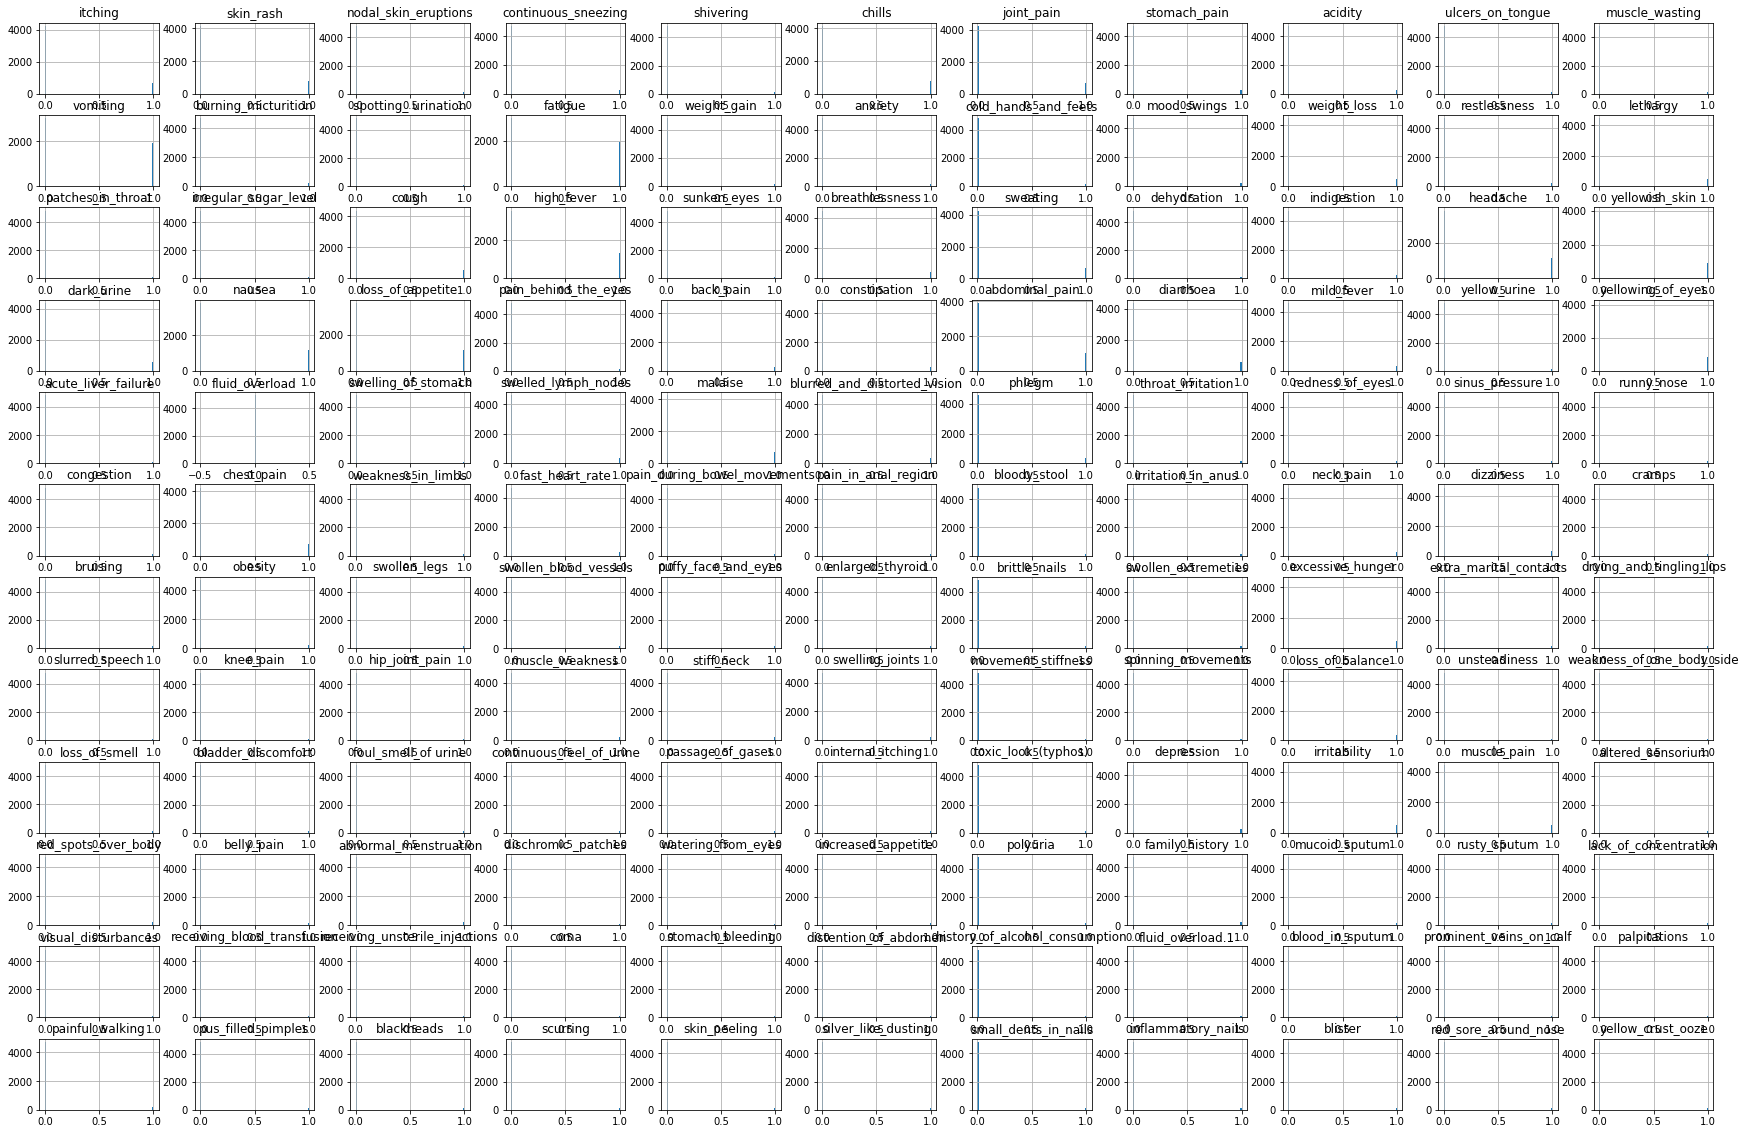

In [141]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 20))
df.hist(bins=100, ax=ax1)
plt.show()

# Decision Tree

Accuracy: 1.0


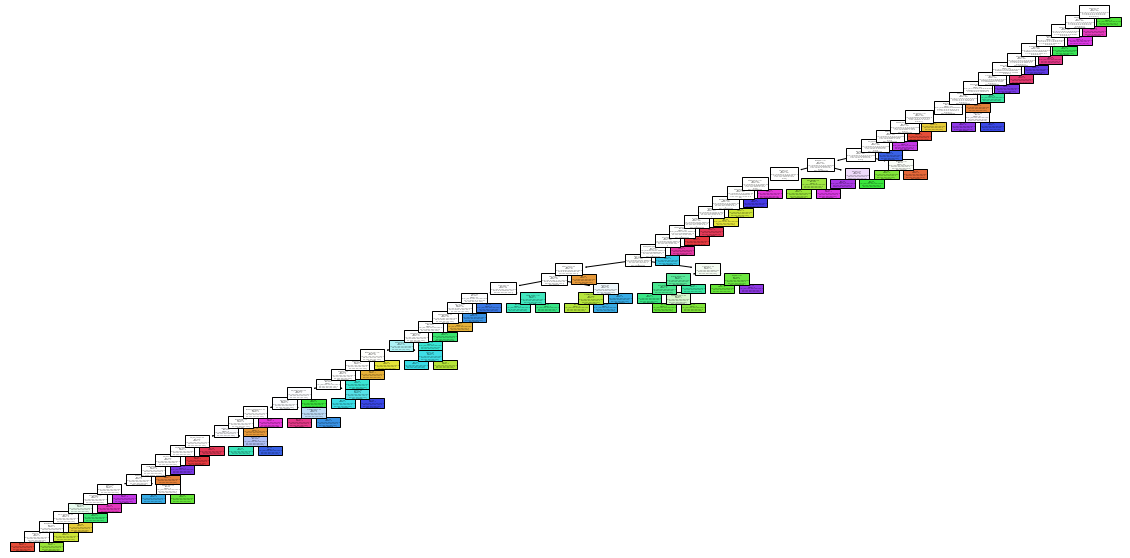

In [142]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree classifier
dt = DecisionTreeClassifier()
clf_dt = dt.fit(X_train, y_train)

# Print accuracy
accuracy = clf_dt.score(X_test, y_test)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_dt, filled=True, feature_names=X_train.columns, class_names=label_encoder.classes_)
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.show()


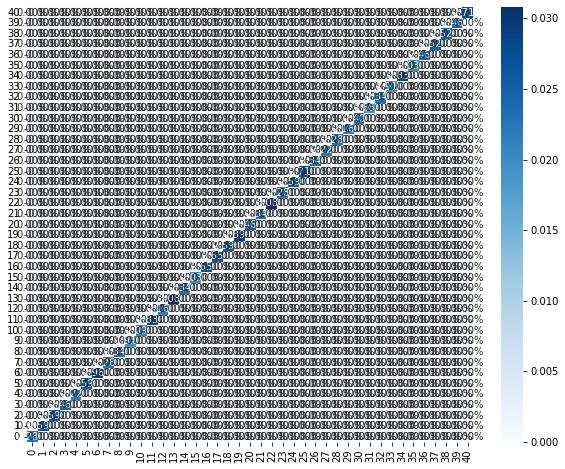

In [143]:
# Predict the response for test dataset
y_pred = clf_dt.predict(X_test)

# Confusion matrix
cf = confusion_matrix(y_test, y_pred)

# Plot the heatmap with zoom
plt.figure(figsize=(10, 8))
sns.heatmap(cf / np.sum(cf), annot=True, fmt='.2%', cmap='Blues')

# Adjust the x-axis and y-axis limits to zoom in
plt.xlim(0, cf.shape[1])
plt.ylim(0, cf.shape[0])

plt.show()

In [144]:
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        37
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        46
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        43
     

## Test Using DT

In [145]:
def check(symptoms):
    # Initialize the user input label
    user_input_label = np.zeros(132)

    # Set the corresponding indices to 1 for the symptoms provided
    for symptom in symptoms:
        idx = dictionary.get(symptom)
        if idx is not None:
            user_input_label[idx] = 1

    # Reshape the user input label
    user_input_label = user_input_label.reshape(1, -1)

    # Get the prediction using the trained Decision Tree classifier
    predicted_label = dt.predict(user_input_label)

    # Map the predicted label back to the symptom name
    predicted_symptom = label_encoder.inverse_transform(predicted_label)

    # Return the predicted symptom
    return predicted_symptom[0]

# Example usage of the check function
example_symptoms = ['headache', 'muscle_weakness', 'puffy_face_and_eyes', 'mild_fever', 'skin_rash']
prediction = check(example_symptoms)
print("Prediction:", prediction)


Prediction: Chicken pox


## XGBClassifier

Accuracy: 1.0


<Figure size 1440x720 with 0 Axes>

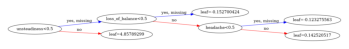

In [146]:
from xgboost import XGBClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the XGBoost classifier
xgb = XGBClassifier()
clf_xgb = xgb.fit(X_train, y_train)

# Print accuracy
accuracy = clf_xgb.score(X_test, y_test)
print("Accuracy:", accuracy)

# Visualize one of the trees in the XGBoost model
plt.figure(figsize=(20, 10))
plot_tree(clf_xgb, num_trees=0, rankdir='LR')
plt.show()


## Testing with XGBClassifier

In [147]:
def check(symptoms):
    # Initialize the user input label
    user_input_label = np.zeros(132)

    # Set the corresponding indices to 1 for the symptoms provided
    for symptom in symptoms:
        idx = dictionary.get(symptom)
        if idx is not None:
            user_input_label[idx] = 1

    # Reshape the user input label
    user_input_label = user_input_label.reshape(1, -1)

    # Get the prediction using the trained XGBoost classifier
    predicted_label = xgb.predict(user_input_label)

    # Map the predicted label back to the symptom name
    predicted_symptom = label_encoder.inverse_transform(predicted_label)

    # Return the predicted symptom
    return predicted_symptom[0]

# Example usage of the check function
example_symptoms = ['headache', 'muscle_weakness', 'puffy_face_and_eyes', 'mild_fever', 'skin_rash']
prediction = check(example_symptoms)
print("Prediction:", prediction)


Prediction: hepatitis A


## Fuzzy-c-means

In [148]:
!pip install fuzzy-c-means

Fuzzy C-means
Predicted cluster for the first data point: [4]


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

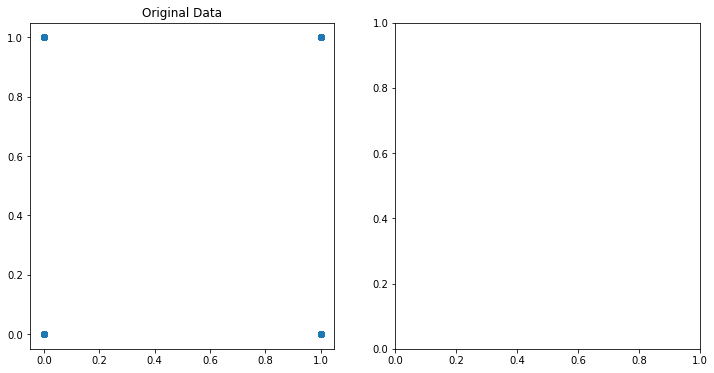

In [149]:
from fcmeans import FCM
from sklearn.metrics import pairwise_distances_argmin_min

# Read the symptoms from the testing dataset
with open('../input/symptom-checker/Testing.csv', newline='') as f:
    reader = csv.reader(f)
    symptoms = next(reader)
    symptoms = symptoms[:-1]

# Generate indices for symptoms
indices = {symptom: idx for idx, symptom in enumerate(symptoms)}

print("Fuzzy C-means")

# Initialize Fuzzy C-means with 5 clusters
fcm = FCM(n_clusters=5)

# Fit Fuzzy C-means with training data
X_train_np = np.array(X_train)
fcm.fit(X_train_np)

# Predict cluster for the first data point in testing data
Y_test_np = np.array(X_test)
predicted_cluster, _ = pairwise_distances_argmin_min(Y_test_np[:1], fcm.centers)
print("Predicted cluster for the first data point:", predicted_cluster)

# Plot result
plt.figure(figsize=(12, 6))

# Plot original data points
plt.subplot(1, 2, 1)
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], alpha=0.1)
plt.title('Original Data')

# Plot data points with predicted cluster
plt.subplot(1, 2, 2)
plt.scatter


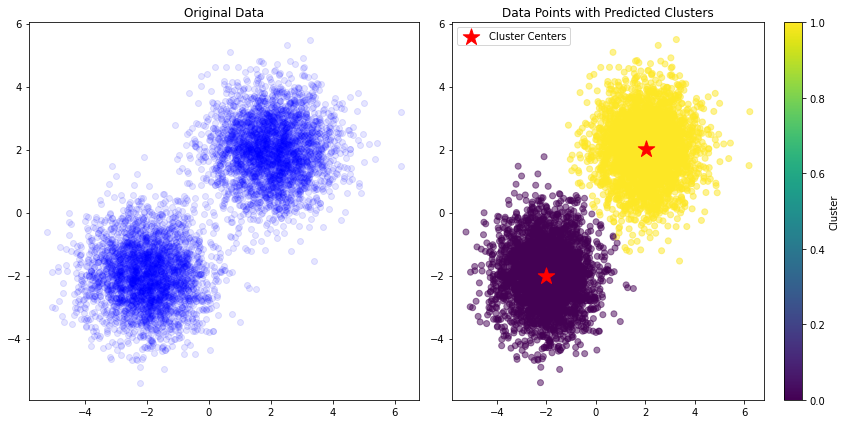

In [150]:
n_samples = 3000

# Generate random data points with two clusters
X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

# Initialize Fuzzy C-means with 2 clusters
fcm = FCM(n_clusters=2)
fcm.fit(X)

# Get the cluster centers and predicted labels
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# Plot the clustering result
plt.figure(figsize=(12, 6))

# Plot original data points
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.1, c='blue')
plt.title('Original Data')

# Plot data points with predicted cluster labels and cluster centers
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=fcm_labels, cmap='viridis', alpha=0.5)
plt.scatter(fcm_centers[:, 0], fcm_centers[:, 1], marker='*', s=300, c='red', label='Cluster Centers')
plt.title('Data Points with Predicted Clusters')
plt.colorbar(label='Cluster')
plt.legend()
plt.tight_layout()
plt.savefig('enhanced-clustering-output.jpg')
plt.show()


## KMeans Algorithm

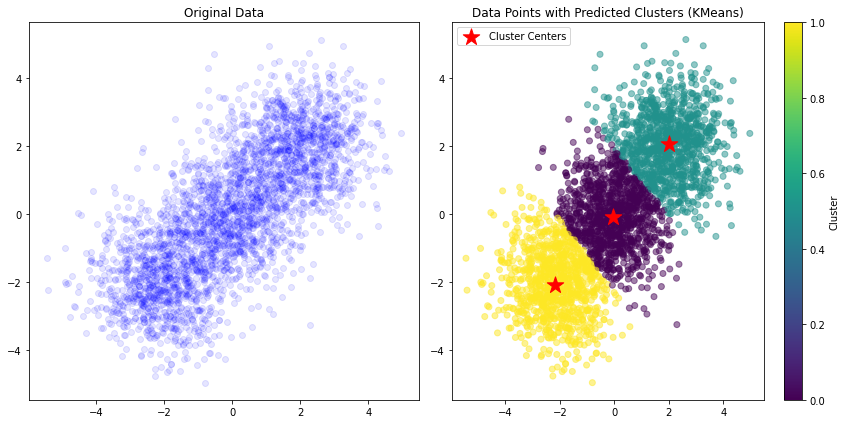

In [151]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate random data points with three clusters
X = np.concatenate((
    np.random.normal((-2, -2), size=(1000, 2)),
    np.random.normal((2, 2), size=(1000, 2)),
    np.random.normal((0, 0), size=(1000, 2))  # Additional cluster
))

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster centers and predicted labels
kmeans_centers = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_

# Plot the clustering result
plt.figure(figsize=(12, 6))

# Plot original data points
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.1, c='blue')
plt.title('Original Data')

# Plot data points with predicted cluster labels and cluster centers
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='*', s=300, c='red', label='Cluster Centers')
plt.title('Data Points with Predicted Clusters (KMeans)')
plt.colorbar(label='Cluster')
plt.legend()
plt.tight_layout()
plt.show()
